In [1]:
#IMDB는 Movie Review Classification을 위한 Dataset이며, 스탠포드 연구자들이 2011년도에 
#총 50000개의 데이터를 반은 트레이닝 반은 테스트로 사용하여 89%의 성능을 얻어냈다.
 
import numpy
from matplotlib import pyplot
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Convolution1D
from keras.layers.convolutional import MaxPooling1D
from matplotlib import pyplot as plt

Using TensorFlow backend.


In [2]:
# MLP for the IMDB problem
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load the dataset but only keep the top n words, zero the rest
top_words = 5000
test_split = 0.33
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=top_words)
max_words = 500
x_train = sequence.pad_sequences(x_train, maxlen=max_words)
x_test = sequence.pad_sequences(x_test, maxlen=max_words)


In [3]:
# create the model
model = Sequential()
model.add(Embedding(top_words, 32, input_length=max_words))
model.add(Convolution1D(nb_filter=32, filter_length=3, border_mode='same'))
#model.add(Dropout(0.25))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_length=2))
model.add(Convolution1D(nb_filter=32, filter_length=3, border_mode='same'))
#model.add(Dropout(0.25))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_length=2))
model.add(Convolution1D(nb_filter=32, filter_length=3, border_mode='same'))
model.add(Dropout(0.25))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_length=2))
model.add(Flatten())
model.add(Dense(250))
model.add(Dropout(0.25))
model.add(Activation('relu'))
model.add(Dense(250))
model.add(Dropout(0.25))
model.add(Activation('relu'))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

# Fit the model
hist = model.fit(x_train, y_train, validation_data=(x_test, y_test), nb_epoch=2, batch_size=64, verbose=1)

# Final evaluation of the model
scores = model.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))
 
 


C:\Users\kimta\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(filters=32, kernel_size=3, padding="same")`
  after removing the cwd from sys.path.
C:\Users\kimta\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `MaxPooling1D` call to the Keras 2 API: `MaxPooling1D(pool_size=2)`
  import sys
C:\Users\kimta\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(filters=32, kernel_size=3, padding="same")`
  
C:\Users\kimta\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Update your `MaxPooling1D` call to the Keras 2 API: `MaxPooling1D(pool_size=2)`
  # This is added back by InteractiveShellApp.init_path()
C:\Users\kimta\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(filters=32, kernel_size=3, padding="same")`
  if sys.path[0] == '':
C

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 32)           160000    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 500, 32)           3104      
_________________________________________________________________
activation_1 (Activation)    (None, 500, 32)           0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 250, 32)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 250, 32)           3104      
_________________________________________________________________
activation_2 (Activation)    (None, 250, 32)           0         
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 125, 32)           0         
__________

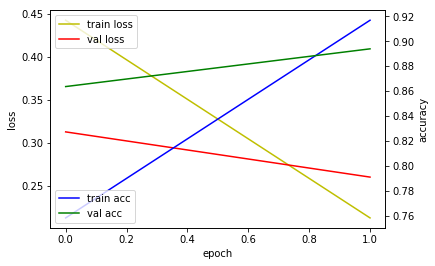

In [4]:
#모델 시각
fig, loss_ax = plt.subplots()
 
acc_ax = loss_ax.twinx()
 
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
 
acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')
 
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax. set_ylabel('accuracy')
 
loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')
 
plt.show()
 
